# Text Analysis in Python 1: Working with Strings & Files

<h1 style="text-align:center;font-size:300%;">The State of the Union is ... long?</h1> 
  <!--<img src="https://miro.medium.com/max/720/1*pp7HX01jBv2wbVRW9Ml_mA.png" style="width:%80;">-->
  <img src = "https://cdn.theatlantic.com/thumbor/7G7_MhUOYg6M8JGSmbQCVoaJ-kY=/126x0:1794x938/1536x864/media/img/2015/01/16/opener_words/original.jpg">

## INTRODUCTION TO TEXT ANALYSIS IN PYTHON
**How can we use computational techniques to analyze texts and then visualize patterns buried within them?** 

**What can we learn about texts by applying text analysis in Python? How do we get started?**

<p>In this session, participants will:</p>

+ Learn how to write basic scripts in Python using Jupyter Notebooks
+ import and pre-process documents
+ analyze each document using word frequencies, collocations, ngram frequencies, etc.

**In particular, our goal is to re-create the word frequency graph (see below) found in [Schmidt & Fraas, “The Language of the State of the Union” (The Atlantic, Jan. 18, 2015)](https://www.theatlantic.com/politics/archive/2015/01/the-language-of-the-state-of-the-union/384575/).**

![](SOTU_TheAtlantic_barplot.png)

  **Before we begin, jot down below (or discuss with your classmates) your answer to the following question: what steps would you need to follow to convert a collection of State of the Union (SOTU) addresses into a bar plot/chart/graph like the one found in the article above?**




## This Tutorial

In this tutorial and notebook, you will practice working with a dataset or corpus of a well-known series of texts: the yearly State of the Union addresses given by Presidents of the United States since 1790.

For a great resource to learn and gain more practice doing text analysis with Python see the online book: Melanie Walsh, [*Introduction to Cultural Analytics and Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html), Version 1 (2021), https://doi.org/10.5281/zenodo.4411250. 

<img src="https://melaniewalsh.github.io/Intro-Cultural-Analytics/_static/favicon.ico" style="width:30%">

<!--All sections below labeled with a **MW** comes from this book. Please consider supporting that project if you find it useful.-->


## Part I. Getting Started

### Downloading and Saving Dataset(s)

We will be working with a corpus of all presidential State of the Union addresses given by U.S. Presidents (1st: 1791, most recent: 2023).



## This Tutorial

In this tutorial and notebook, you will practice working with a dataset or corpus of a well-known series of texts: the yearly State of the Union addresses given by Presidents of the United States since 1790.

## Part I: Importing Python Packages or Libraries

1. Before beginning, we need to import some packages. Often, we need to install and import customized Python packages (sometimes called "modules") in addition to the core functions (like **print()**, **len()**, **sum()**, and others).

In [1]:
import os, pathlib, glob #these packages allow us to navigate through the files on our own computers
from pathlib import Path #the pathlib package helps us work with file paths
#for more on using pathlib see: https://builtin.com/software-engineering-perspectives/python-pathlib
import collections

import pandas as pd #for creating and working with dataframes
import nltk, re #we can import multiple packages on one line using commas to separate new package names
from nltk import RegexpTokenizer 
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag, word_tokenize, sent_tokenize
nltk.download('punkt')

#matplotlib and seaborn are used here to create graphs, charts, and other visualizations
import matplotlib.pyplot as plt #needed for xticks
import seaborn as sns

#code below modifies how plots will be shown in this notebook
plt.rcParams['figure.figsize'] = [12, 8]  #changes default figure size to make larger plots
%config InteractiveShellApp.matplotlib = 'inline'
%config InlineBackend.figure_formats = ['svg']

#Press CTRL+Enter to run this codeblock! 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F0040RP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1b. If the above prints out the error message: "ModuleNotFoundError: No module named 'nltk'". Uncomment out the code below (by removing the #) and run it. Then run the above cell of code (with all the import commands) again.

In [2]:
#!pip install nltk

# Part II: Navigating through the files in a directory (whether on your computer or on a remote server)

<!--1. To work with the State of the Union addresses you downloaded (hereafter: SOTU), we will need to navigate to the folder you placed them in. First, check the "current working directory" that Python is working with:-->
3. To work with our State of the Union address text corpus, we will need to navigate to the folder we placed them in.



In [3]:
print(Path.cwd())  #prints out the current working directory (where Python will look for files unless we specify otherwise)

c:\Users\F0040RP\Documents\DartLib_RDS\yamasani\qbs


4. Your current working directory, printed out in the previous step, is the location where this notebook is saved. 

In [4]:
list(Path.iterdir(Path.cwd()))

#Do you see the "state of the union dataset" folder in the list below?

[WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/.git'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/annotated-QBS181_Data_Description.pdf'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/average-latitude-longitude-countries.csv'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/completed_1c_TextAnalysis_one_document.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/completed_1d_TextAnalysis_corpus.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/completed_NLP1a_TextAnalysis_one_document.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/completed_NLP1b_TextAnalysis_corpus.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/completed_NLP3_TopicsAndEmotions.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/yamasani/qbs/completed_visualization1_titanic.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/Da

5. Next, we will look inside the "state-of-the-union-dataset" folder containing our corpus of State of the Union speeches (henceforth: SOTU). We can learn something about this dataset simply by examining the titles of the individual files.

In [5]:
#sotudir = Path("state-of-the-union-dataset","txt")    
sotudir = Path(Path.cwd().parent.parent, "state-of-the-union-dataset","txt")   #REPLACE WITH PROPER PATH TO WHERE YOU SAVE THE SOTU TEXT FILES!!!
print(set([item.suffix for item in list(Path.iterdir(sotudir))]))  #get unique suffixes or file extensions in sotudir 
[item.name for item in list(Path.iterdir(sotudir))] #to get filename only

{'.txt'}


['Adams_1797.txt',
 'Adams_1798.txt',
 'Adams_1799.txt',
 'Adams_1800.txt',
 'Adams_1825.txt',
 'Adams_1826.txt',
 'Adams_1827.txt',
 'Adams_1828.txt',
 'Arthur_1881.txt',
 'Arthur_1882.txt',
 'Arthur_1883.txt',
 'Arthur_1884.txt',
 'Biden_2021.txt',
 'Biden_2022.txt',
 'Biden_2023.txt',
 'Buchanan_1857.txt',
 'Buchanan_1858.txt',
 'Buchanan_1859.txt',
 'Buchanan_1860.txt',
 'Buren_1837.txt',
 'Buren_1838.txt',
 'Buren_1839.txt',
 'Buren_1840.txt',
 'Bush_1989.txt',
 'Bush_1990.txt',
 'Bush_1991.txt',
 'Bush_1992.txt',
 'Bush_2001.txt',
 'Bush_2002.txt',
 'Bush_2003.txt',
 'Bush_2004.txt',
 'Bush_2005.txt',
 'Bush_2006.txt',
 'Bush_2007.txt',
 'Bush_2008.txt',
 'Carter_1978.txt',
 'Carter_1979.txt',
 'Carter_1980.txt',
 'Carter_1981.txt',
 'Cleveland_1885.txt',
 'Cleveland_1886.txt',
 'Cleveland_1887.txt',
 'Cleveland_1888.txt',
 'Cleveland_1893.txt',
 'Cleveland_1894.txt',
 'Cleveland_1895.txt',
 'Cleveland_1896.txt',
 'Clinton_1993.txt',
 'Clinton_1994.txt',
 'Clinton_1995.txt',
 'Cl

## Part III: Reading Files and Examining Their Contents

6. Open one SOTU text.

In [6]:
with open(Path(sotudir,"Bush_2002.txt"), encoding='utf-8') as f:
    sotu1 = f.read()

## ** calling utf-8 encoding may not be necessary
## but is good practice if you ever work with foreign languages (besides special characters can appear in English too, as in 
## loan words like naïve and résumé )


##[DISCUSS WHY IT IS GOOD PRACTICE TO CLOSE FILES IMMEDIATELY AFTER YOU ARE DONE WITH THEM]

In [7]:
## we can view the whole text simply by typing the file name
sotu1  #Jupyter, however, requires the print() command to print out any information not found in the last line of code in a codeblock

'Thank you very much. Mr. Speaker, Vice President Cheney, Members of Congress,\ndistinguished guests, fellow citizens: As we gather tonight, our Nation is at\nwar; our economy is in recession; and the civilized world faces unprecedented\ndangers. Yet, the state of our Union has never been stronger.\n\nWe last met in an hour of shock and suffering. In 4 short months, our Nation has\ncomforted the victims, begun to rebuild New York and the Pentagon, rallied a\ngreat coalition, captured, arrested, and rid the world of thousands of\nterrorists, destroyed Afghanistan\'s terrorist training camps, saved a people\nfrom starvation, and freed a country from brutal oppression.\n\nThe American flag flies again over our Embassy in Kabul. Terrorists who once\noccupied Afghanistan now occupy cells at Guantanamo Bay. And terrorist leaders\nwho urged followers to sacrifice their lives are running for their own.\n\nAmerica and Afghanistan are now allies against terror. We\'ll be partners in\nrebuilding 

<div class="alert alert-success" role="alert">
    <p style="color:green"><b>6b. Code Together</b>: Open a second SOTU address (of your own choosing) and save it into the variable "sotu2".</p>
</div>

In [8]:
with open(Path(sotudir,"Roosevelt_1944.txt"),encoding='utf-8') as f:
    sotu2 = f.read()

7. What do the following blocks of code do? Run them and then share your answer.

In [9]:
print(len(sotu1)) 

22617


In [10]:
sotu1[0:20]

'Thank you very much.'

In [11]:
sotu1[:20] 

'Thank you very much.'

In [12]:
sotu1[20:40]

' Mr. Speaker, Vice P'

In [13]:
sotu1[-60:]

"e\nwill see freedom's victory.\n\nThank you all. May God bless."

<h3 style="color:blue;">Exercises for Part III</h3>
    
<p style="color:blue;">8. Add a coding cell below and print out the first and last 200 characters in your selected <b>sotu2</b> address. Can you identify any major themes from the opening and closing words of this address? If not, expand the number of characters you are examining.</p>

In [14]:
print(sotu2[:200])
sotu2[-200:]

To the Congress:

This Nation in the past two years has become an active partner in the
world's greatest war against human slavery.

We have joined with like-minded people in order to defend ourselves


'nd his Government.\n\nEach and every one of us has a solemn obligation under God to serve this\nNation in its most critical hour--to keep this Nation great--to make this\nNation greater in a better world.'

## Part IV. Divide a text into tokens

There are different ways to tokenize a text. Two examples from the **Natural Language Toolkit (nltk)** package are provided below:

"Tokens" can be words, but also punctuation, sets of numbers, etc.

9. **First**, let's try **nltk**'s **word_tokenize()** method.

In [15]:
tokens = nltk.word_tokenize(sotu1)
print(tokens[0:30]) #notice the difference between these tokens and "rawtokens" above
print(len(tokens))

['Thank', 'you', 'very', 'much', '.', 'Mr.', 'Speaker', ',', 'Vice', 'President', 'Cheney', ',', 'Members', 'of', 'Congress', ',', 'distinguished', 'guests', ',', 'fellow', 'citizens', ':', 'As', 'we', 'gather', 'tonight', ',', 'our', 'Nation', 'is']
4352


10. **Second**, NLTK offers another way to tokenize, but this time removing punctuation.

In [16]:
#another way to tokenize
from nltk import RegexpTokenizer  
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(sotu1)
print(tokens[:30])
print(len(tokens))

['Thank', 'you', 'very', 'much', 'Mr', 'Speaker', 'Vice', 'President', 'Cheney', 'Members', 'of', 'Congress', 'distinguished', 'guests', 'fellow', 'citizens', 'As', 'we', 'gather', 'tonight', 'our', 'Nation', 'is', 'at', 'war', 'our', 'economy', 'is', 'in', 'recession']
3875


<h3 style="color:blue;">Exercises for Part IV</h3>
    
<p style="color:blue;">10b. Tokenize your chosen sotu2 text using one of the above two methods.</p>

In [17]:
tokens=tokenizer.tokenize(sotu2)
print(tokens[:30])

['To', 'the', 'Congress', 'This', 'Nation', 'in', 'the', 'past', 'two', 'years', 'has', 'become', 'an', 'active', 'partner', 'in', 'the', 'world', 's', 'greatest', 'war', 'against', 'human', 'slavery', 'We', 'have', 'joined', 'with', 'like', 'minded']


## V. Words Count / Word Counts

11. We can count the length of a text using the **len()** function. Run the following two lines of code below. What is the difference between the two?

In [18]:
print(len(sotu1))
print(len(tokens))

22617
3849


12. We can create a frequency list of words in this State of the Union Address using the **Counter()** function from the Python **collections** library. 

In [19]:
tokfreqs = collections.Counter(tokens)
tokfreqs.most_common(60)         #to view the 60 most common items in tokfreqs
#tokfreqs.most_common()[-100:]   #to view the 60 least common items in tokfreqs

[('the', 226),
 ('of', 157),
 ('and', 140),
 ('to', 129),
 ('in', 82),
 ('that', 64),
 ('a', 63),
 ('our', 48),
 ('war', 46),
 ('for', 43),
 ('is', 41),
 ('are', 40),
 ('have', 33),
 ('this', 33),
 ('we', 32),
 ('be', 30),
 ('all', 30),
 ('I', 29),
 ('not', 28),
 ('which', 28),
 ('will', 27),
 ('at', 24),
 ('or', 24),
 ('The', 22),
 ('on', 21),
 ('Nation', 19),
 ('It', 19),
 ('as', 19),
 ('it', 17),
 ('by', 16),
 ('with', 15),
 ('from', 15),
 ('can', 14),
 ('their', 14),
 ('service', 14),
 ('Congress', 13),
 ('In', 13),
 ('these', 13),
 ('national', 13),
 ('an', 12),
 ('people', 12),
 ('were', 12),
 ('they', 12),
 ('was', 12),
 ('right', 12),
 ('who', 12),
 ('one', 12),
 ('men', 12),
 ('We', 11),
 ('And', 11),
 ('time', 10),
 ('living', 10),
 ('Government', 10),
 ('home', 10),
 ('has', 9),
 ('been', 9),
 ('peace', 9),
 ('security', 9),
 ('if', 9),
 ('American', 9)]

13, What do you notice? How can we make this frequency list more revealing?

**14. We can convert all the tokens to lower-case.**

In [20]:
ltokens = [tok.lower() for tok in tokens]
print("our tokens2 list converted to lower-case (saved as ltokens2) - contains",len(ltokens),"tokens.")
print(ltokens[:40])

our tokens2 list converted to lower-case (saved as ltokens2) - contains 3849 tokens.
['to', 'the', 'congress', 'this', 'nation', 'in', 'the', 'past', 'two', 'years', 'has', 'become', 'an', 'active', 'partner', 'in', 'the', 'world', 's', 'greatest', 'war', 'against', 'human', 'slavery', 'we', 'have', 'joined', 'with', 'like', 'minded', 'people', 'in', 'order', 'to', 'defend', 'ourselves', 'in', 'a', 'world', 'that']


**15. We often want to remove stopwords**. **Stop words** are common words that reveal little about the meaning of a text (such as articles like "the", conjunctions like "and", prepositions like "on", pronouns like "our", and helper verbs like "can"). Fortunately, NLTK provides a list of stop words in English (and other languages as well) that we can use to eliminate all such words from our texts.

Let's examine stopwords in English:

In [21]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<div class="alert alert-success" role="alert">
    <p style="color:green"><b>Code Together</b>: 16. What if you work with another language? Let's print out the language options for NLTK's stopwords:</p>
</div>

In [22]:
# languages in nltk
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


<div class="alert alert-success" role="alert">
    <p style="color:green">17. Now try to print out stopwords from a language of your choice (using the same code we used above to print out English stopwords):</p>
</div>

In [23]:
print(stopwords.words('spanish'))



['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

18. Next, with our English stopwords list, we can further modify our ltokens list by removing stopwords:

In [24]:
stop = stopwords.words('english')
stop = sorted(stop)
ltokens_ns = [tok for tok in ltokens if tok not in stop]        #list comprehension removes all stopwords from ltokens2

print("We had",len(ltokens),"tokens in our ltoken2 list.")
print("beginning with:",ltokens[:30]," \n")
print("After removing stop words, we now have",len(ltokens_ns),"tokens in our list.")
print("beginning with:",ltokens_ns[:30])

We had 3849 tokens in our ltoken2 list.
beginning with: ['to', 'the', 'congress', 'this', 'nation', 'in', 'the', 'past', 'two', 'years', 'has', 'become', 'an', 'active', 'partner', 'in', 'the', 'world', 's', 'greatest', 'war', 'against', 'human', 'slavery', 'we', 'have', 'joined', 'with', 'like', 'minded']  

After removing stop words, we now have 1878 tokens in our list.
beginning with: ['congress', 'nation', 'past', 'two', 'years', 'become', 'active', 'partner', 'world', 'greatest', 'war', 'human', 'slavery', 'joined', 'like', 'minded', 'people', 'order', 'defend', 'world', 'gravely', 'threatened', 'gangster', 'rule', 'think', 'us', 'americans', 'content', 'mere', 'survival']


19. We can then count the frequencies of words in this token list using the **Counter** function from the **collections** library we imported at the top of this notebook.

In [25]:
tokfreqs = collections.Counter(ltokens_ns)
tokfreqs.most_common()

[('war', 50),
 ('nation', 19),
 ('national', 17),
 ('service', 15),
 ('congress', 13),
 ('people', 13),
 ('one', 13),
 ('right', 12),
 ('men', 12),
 ('time', 10),
 ('security', 10),
 ('living', 10),
 ('government', 10),
 ('home', 10),
 ('peace', 9),
 ('american', 9),
 ('rights', 9),
 ('us', 8),
 ('shall', 8),
 ('must', 8),
 ('make', 8),
 ('world', 7),
 ('nations', 7),
 ('freedom', 7),
 ('law', 7),
 ('allies', 6),
 ('made', 6),
 ('political', 6),
 ('individual', 6),
 ('fact', 6),
 ('standard', 6),
 ('women', 6),
 ('country', 6),
 ('know', 6),
 ('great', 6),
 ('profits', 6),
 ('cannot', 6),
 ('every', 6),
 ('two', 5),
 ('upon', 5),
 ('new', 5),
 ('common', 5),
 ('win', 5),
 ('want', 5),
 ('forces', 5),
 ('enemies', 5),
 ('possible', 5),
 ('economic', 5),
 ('essential', 5),
 ('among', 5),
 ('demands', 5),
 ('accepted', 5),
 ('groups', 5),
 ('effort', 5),
 ('prices', 5),
 ('soldiers', 5),
 ('sailors', 5),
 ('would', 5),
 ('cost', 5),
 ('certain', 5),
 ('responsibility', 5),
 ('years', 4),


<div class="alert alert-success" role="alert">
    <p style="color:green"><b>Code Together</b>:</p> 
    <p style="color:green">20. Using your chosen <b>sotu2</b> address:</p>
    <ol style="color:green"> 
        <li>tokenize it</li> 
        <li>lower-case it</li> 
        <li>remove all stopwords</li>
        <li>create a frequency count of the words in this address</li> 
        <li>identify the 30 most frequent tokens (with stopwords removed).</li>
    </ol>
</div>

In [26]:
#sotu2_tokens = nltk.word_tokenize(sotu1)
sotu2_tokens = tokenizer.tokenize(sotu2)
#sotu2_ltokens_ns = [tok.lower() for tok in sotu2_tokens if tok.lower() not in stop]   #there was a problem when I initially ran "tok not in stop" !!
##better for beginners:
sotu2_ltokens = [tok.lower() for tok in sotu2_tokens]
sotu2_ltokens_ns = [tok for tok in sotu2_ltokens if tok not in stop]
tokfreqs_sotu2 = collections.Counter(sotu2_ltokens_ns)
tokfreqs_sotu2.most_common(30)

[('war', 50),
 ('nation', 19),
 ('national', 17),
 ('service', 15),
 ('congress', 13),
 ('people', 13),
 ('one', 13),
 ('right', 12),
 ('men', 12),
 ('time', 10),
 ('security', 10),
 ('living', 10),
 ('government', 10),
 ('home', 10),
 ('peace', 9),
 ('american', 9),
 ('rights', 9),
 ('us', 8),
 ('shall', 8),
 ('must', 8),
 ('make', 8),
 ('world', 7),
 ('nations', 7),
 ('freedom', 7),
 ('law', 7),
 ('allies', 6),
 ('made', 6),
 ('political', 6),
 ('individual', 6),
 ('fact', 6)]

## VI. Ngrams

What if we want to examine the frequency of multiple-word terms and phrases? 

Instead of splitting texts into words, we can split them into bigrams (two-word combinations), trigrams (three-word combinations), and other *n*grams (terms with *n* number of words).

A great tool for examining the frequency of ngrams over time is [Google's Ngram Viewer.](https://books.google.com/ngrams/) Click on this link and try some different combinations.

<!--<h1>
    <img src = "C:\Users\F0040RP\Documents\Website\images\textAnalysis\google_ngrams_history_subfields.png" style = "width: 80%">
    <img src = "https://books.google.com/ngrams/graph?content=cultural+history%2Cpolitical+history%2Cintellectual+history%2Cmicrohistory%2C+women%27s+history&year_start=1800&year_end=2019&corpus=en-2019&smoothing=3" style="width:80%;">
</h1>-->

21. To create, count, and analyze ngrams from our own texts and corpora, we can use **NLTK**'s **ngrams** function, which reads in a list of tokens and the number of words we want per combination. For example:

In [27]:
n = 2
bigrams = list(nltk.ngrams(["to", "be", ",", "or", "not", "to", "be", ",", "that", "is", "the", "question", "."], n))
print(bigrams)

[('to', 'be'), ('be', ','), (',', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be'), ('be', ','), (',', 'that'), ('that', 'is'), ('is', 'the'), ('the', 'question'), ('question', '.')]


In [28]:
collections.Counter(bigrams)

Counter({('to', 'be'): 2,
         ('be', ','): 2,
         (',', 'or'): 1,
         ('or', 'not'): 1,
         ('not', 'to'): 1,
         (',', 'that'): 1,
         ('that', 'is'): 1,
         ('is', 'the'): 1,
         ('the', 'question'): 1,
         ('question', '.'): 1})

In [29]:
n = 2
n_grams=list(nltk.ngrams(ltokens_ns,n))
print(n_grams)

[('congress', 'nation'), ('nation', 'past'), ('past', 'two'), ('two', 'years'), ('years', 'become'), ('become', 'active'), ('active', 'partner'), ('partner', 'world'), ('world', 'greatest'), ('greatest', 'war'), ('war', 'human'), ('human', 'slavery'), ('slavery', 'joined'), ('joined', 'like'), ('like', 'minded'), ('minded', 'people'), ('people', 'order'), ('order', 'defend'), ('defend', 'world'), ('world', 'gravely'), ('gravely', 'threatened'), ('threatened', 'gangster'), ('gangster', 'rule'), ('rule', 'think'), ('think', 'us'), ('us', 'americans'), ('americans', 'content'), ('content', 'mere'), ('mere', 'survival'), ('survival', 'sacrifices'), ('sacrifices', 'allies'), ('allies', 'making'), ('making', 'impose'), ('impose', 'upon'), ('upon', 'us'), ('us', 'sacred'), ('sacred', 'obligation'), ('obligation', 'see'), ('see', 'war'), ('war', 'children'), ('children', 'gain'), ('gain', 'something'), ('something', 'better'), ('better', 'mere'), ('mere', 'survival'), ('survival', 'united'), (

In [30]:
collections.Counter(n_grams).most_common()

[(('national', 'service'), 10),
 (('standard', 'living'), 6),
 (('men', 'women'), 6),
 (('win', 'war'), 5),
 (('soldiers', 'sailors'), 5),
 (('mr', 'hull'), 3),
 (('cairo', 'teheran'), 3),
 (('common', 'sense'), 3),
 (('war', 'workers'), 3),
 (('fixed', 'income'), 3),
 (('service', 'law'), 3),
 (('armed', 'forces'), 3),
 (('right', 'every'), 3),
 (('greatest', 'war'), 2),
 (('mere', 'survival'), 2),
 (('shall', 'repeat'), 2),
 (('fight', 'win'), 2),
 (('suspicious', 'souls'), 2),
 (('made', 'commitments'), 2),
 (('secret', 'treaties'), 2),
 (('marshal', 'stalin'), 2),
 (('defeat', 'enemies'), 2),
 (('economic', 'security'), 2),
 (('raise', 'standards'), 2),
 (('standards', 'living'), 2),
 (('interests', 'nation'), 2),
 (('large', 'small'), 2),
 (('american', 'standard'), 2),
 (('plain', 'common'), 2),
 (('moscow', 'cairo'), 2),
 (('faulty', 'perspective'), 2),
 (('overwhelming', 'majority'), 2),
 (('quickly', 'possible'), 2),
 (('special', 'groups'), 2),
 (('national', 'effort'), 2),
 

<h3 style="color:blue;">Exercises for Part VI</h3>
    
<p style="color:blue;">21b. Create ngrams from sotu2. Try bigrams, trigrams, and even ngrams of length 4. Then identify the most common of these ngrams. Are these results useful to understanding this particular text?</p>

## VII. Other NLTK functions

In [31]:
text1 = nltk.Text(tokens) #to use many of nltk's functions we need to convert our tokens list into a nltk.Text object
    #remember, the tokens variable stores our first set of tokens derived from Washington's 1794 address
    ## for concordances, it makes sense to work with unmodified tokens (in original case with all words and punctuation
    ## still included)
text1.concordance("government")

Displaying 10 of 10 matches:
l remember that all of us in this Government represent the fixed income group 
at attitude on the part of anyone Government or management or labor can length
d in favor of the allies But this Government did not relax In fact our nationa
its and assure fair prices to the Government For two long years I have pleaded
of food law which will enable the Government a to place a reasonable floor und
prevent undue profits The Federal Government already has the basic power to dr
and women who are assigned by the Government to its defense at the battlefront
e hundreds of fighting planes The Government told me that in doing that I was 
 It is to their demands that this Government should pay heed rather than to th
 the civilian the citizen and his Government Each and every one of us has a so


In [32]:
text1.collocations()

national service; fixed income; armed forces; common sense; Marshal
Stalin; faulty perspective; secret treaties; suspicious souls; mere
survival; old age; overwhelming majority; National service; Moscow
Cairo; undue profits; lasting peace; plain common; special groups; war
workers; economic security; political rights


In [33]:
text1.count("terror")

0

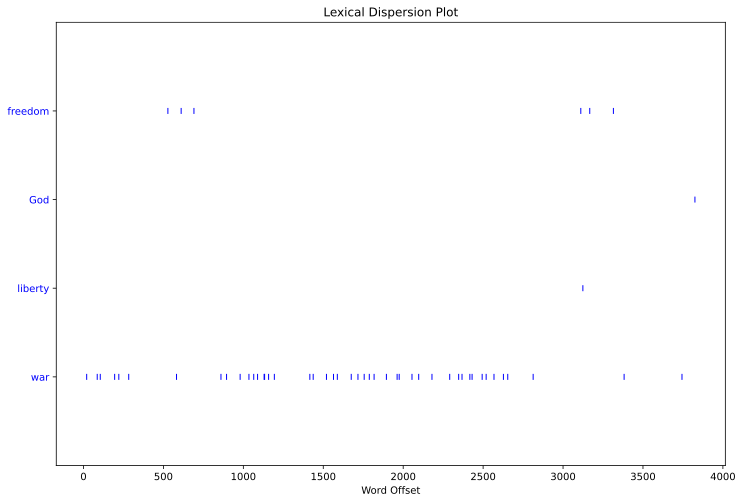

In [34]:
text1.dispersion_plot(["freedom", "God", "liberty", "war"])

In [35]:
text1.similar("freedom")

<h3 style="color:blue;">Exercises for Part VII</h3>
    
<p style="color:blue;">Read the tokens from sotu2 into nltk.Text. Then try applying some of the nltk functions introduced above.</p>

In [36]:
text2 = nltk.Text(sotu2_tokens)
text2.similar("war")

congress nation world peace right generalissimo course plans time
resources opportunity fact men country first chance great waters
revolution conflict


In [37]:
text2.concordance("conflict")

Displaying 1 of 1 matches:
ear during the final months of the conflict In this war we have been compelled
